In [9]:
#A análise foi realizada com base no arquivo "processadores_limpo.xlsx" contendo informações sobre processadores Intel e AMD. No processo de web scraping, foram coletados os seguintes dados: marca, preço, fabricante e tipo de soquete.

# chamando o arquivo

import pandas as pd

# Carregar o arquivo
df = pd.read_excel("processadores_limpo.xlsx")


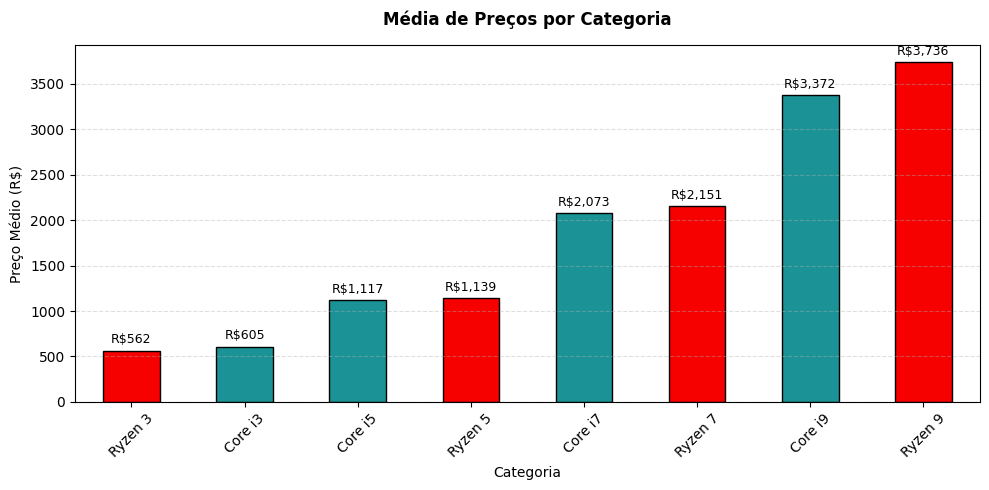

In [10]:
# separa os processadores por classe, Ryzen 3, 5, 7, 9 e Intel 3, 5, 7, 9
#soma os valores de cada classe e faz a media de preço

import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_excel('processadores_limpo.xlsx')

# Criar categorias
def get_category(modelo):
    modelo = str(modelo).lower()
    if 'ryzen 3' in modelo: return 'Ryzen 3'
    elif 'ryzen 5' in modelo: return 'Ryzen 5'
    elif 'ryzen 7' in modelo: return 'Ryzen 7'
    elif 'ryzen 9' in modelo: return 'Ryzen 9'
    elif 'core i3' in modelo or 'i3-' in modelo: return 'Core i3'
    elif 'core i5' in modelo or 'i5-' in modelo: return 'Core i5'
    elif 'core i7' in modelo or 'i7-' in modelo: return 'Core i7'
    elif 'core i9' in modelo or 'i9-' in modelo: return 'Core i9'
    return None

# Filtrar e calcular médias
df['Categoria'] = df['Modelo'].apply(get_category)
df_filtered = df.dropna(subset=['Categoria'])
avg_prices = df_filtered.groupby('Categoria')['preço'].mean().sort_values()

# Configurar o gráfico
plt.figure(figsize=(10, 5))
colors = ['#f60000' if 'Ryzen' in x else '#1b9396' for x in avg_prices.index]
avg_prices.plot(kind='bar', color=colors, edgecolor='black')

# Adicionar detalhes
plt.title('Média de Preços por Categoria', pad=15, fontweight='bold')
plt.xlabel('Categoria')
plt.ylabel('Preço Médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adicionar valores nas barras
for i, price in enumerate(avg_prices):
    plt.text(i, price + 50, f'R${price:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Top 10 processadores mais caros:
Modelo
Core I9 14900KS    7822.55
Ryzen 9 9950X3D    5299.99
Ryzen 9 9950X3D    5129.90
Ryzen 9 9900X      5007.10
Ryzen 9 7950X3D    5005.11
Ryzen 9 7950X3D    4999.99
Ryzen 9 9900X3D    4785.81
Core I9 13900K     4779.00
Core I7 14700K     4742.36
Ryzen 7 7800X3D    4599.90
Name: preço, dtype: float64


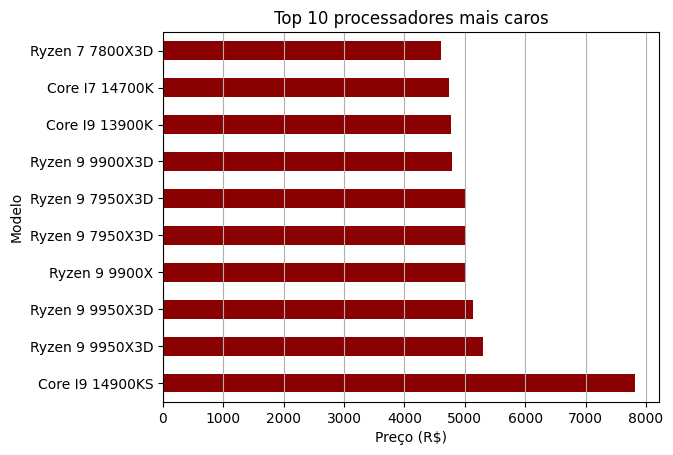

In [11]:
# Top 10 processadores mais caros
top10_caros = df.nlargest(10, 'preço').set_index('Modelo')['preço']

print("\nTop 10 processadores mais caros:")
print(top10_caros)

top10_caros.plot(kind='barh', color='darkred')
plt.title('Top 10 processadores mais caros')
plt.xlabel('Preço (R$)')
plt.ylabel('Modelo')
plt.grid(axis='x')
plt.show()


Preço médio por soquete:
Soquetes
AM5          2769.884167
LGA1851      2669.000000
FCLGA1200    2546.990000
LGA1700      2093.462308
LGA1200      1196.552391
AM4          1171.932558
LGA1156       568.980000
FCLGA1151     451.566667
LGA1151       432.912000
LGA1155       294.386471
LGA1150       291.438333
FCLGA1155     221.115000
FCLGA1150     195.580000
Name: preço, dtype: float64


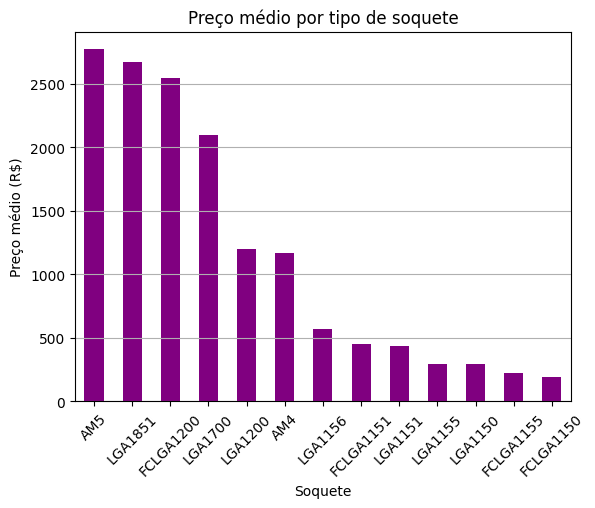

In [12]:
# Preço médio por soquete
# pega os soquetes e soma o valor de cada processador e tira a media
preco_medio_soquete = df.groupby('Soquetes')['preço'].mean().sort_values(ascending=False)

print("\nPreço médio por soquete:")
print(preco_medio_soquete)

preco_medio_soquete.plot(kind='bar', color='purple')
plt.title('Preço médio por tipo de soquete')
plt.xlabel('Soquete')
plt.ylabel('Preço médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()